In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline 
from imblearn import combine
from imblearn import under_sampling
from imblearn import over_sampling
from sklearn import ensemble
from sklearn import neural_network
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
np.seterr(divide='ignore', invalid='ignore')
#svm.LinearSVC
#neighbors.KNeighborsClassifier
#neural_network.MLPClassifier
#ensemble.RandomForestClassifier

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

(85273, 24, 24, 1)
3


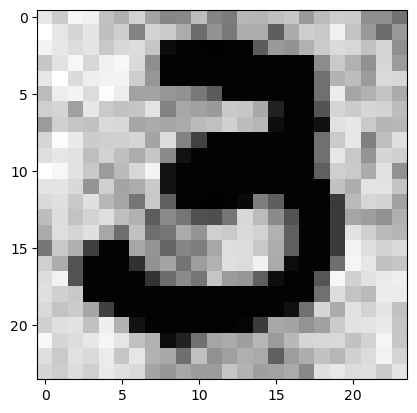

In [2]:
X = np.load("MNIST-images.npy")
y = np.load("MNIST-labels.npy")
print(X.shape)

X = X.reshape(X.shape[0], 576)

X_train, X_valTest, y_train, y_valTest = train_test_split(X, y, test_size=.3, random_state=42)

X_train = X_train.reshape(59691, 24, 24)
plt.imshow(X_train[42], cmap="Greys")
print(y_train[42])

X_train = X_train.reshape(X_train.shape[0], 576)

In [3]:
#explore = pd.DataFrame(data=y)
#print(explore.value_counts())

def preprocess(data):
    X_train = np.array([np.squeeze(i) for i in data])

    X_train[X_train >= 190] = 255
    X_train[X_train < 190] = 0

    # pca = PCA(n_components=.9)
    # pca_arr = []
    # for i in range(len(X_train)):
    #     hold = [pca.fit_transform(X_train[i])]
    #     pca_arr.append([pca.inverse_transform(hold[0])])

    # X_train = np.array([np.squeeze(i) for i in pca_arr])

    # X_train[X_train >= 190] = 255
    # X_train[X_train < 190] = 0

    return X_train

#plt.imshow(preprocess(X_train)[42], cmap="Greys")

In [4]:
from sklearn.preprocessing import FunctionTransformer
X_train = preprocess(X_train)
pre_trans = FunctionTransformer(preprocess)

In [5]:
smote = over_sampling.RandomOverSampler(sampling_strategy="minority")
X_train, y_train = smote.fit_resample(X_train , y_train)

smote = under_sampling.RandomUnderSampler(sampling_strategy="all")
X_train, y_train = smote.fit_resample(X_train , y_train)

X_val, X_test, y_val, y_test = train_test_split(X_valTest, y_valTest, test_size=.5, random_state=42)

score = pd.DataFrame(np.array(y_val), columns = ["actual"])

explore = pd.DataFrame(data=y_train)
exploreX = pd.DataFrame(data=y_train)
print(explore.value_counts())

0     3778
1     3778
2     3778
3     3778
4     3778
5     3778
6     3778
7     3778
8     3778
9     3778
10    3778
dtype: int64


In [7]:
models = {
        'LogisticRegression'     : linear_model.LogisticRegression(),
        'MLP'                    : neural_network.MLPClassifier(),
        'RandomForestClassifier' : ensemble.RandomForestClassifier(),
        'KNN'                    : neighbors.KNeighborsClassifier()}

hyper = {
        
        'LogisticRegression':{
                                    'penalty'     : ['l2'],
                                    'C'           : np.logspace(0, 4, 10),
                                    'solver'      : ['lbfgs', 'liblinear', 'saga'],
                                    'class_weight': ['balanced'],
                                    'random_state': [0]},
        
        'MLP':{
                                    'hidden_layer_sizes' : [1, 10, 50, 100, 200, 500],},
        
        'RandomForestClassifier':{
                                    'max_depth': [2, 3, 4],
                                    'max_features': [2, 3, 4, 'auto', 'sqrt'],
                                    'n_estimators': [10, 100, 500, 1000],
                                    'class_weight': ['balanced'],
                                    'random_state': [0]},
       
        'KNN':{
                                    'n_neighbors': [5, 10, 15, 20],
                                    'weights': ['uniform', 'distance']}
                              
                              
    }


for model_name in models.keys():

  # Model selection
  clf    = models[model_name]
  params = hyper[model_name]

  # Pipeline (standarization + classifier)
  pipe = Pipeline([ ('PCA', PCA(.9)), ( 'clf', clf ) ])
 
  # Gridsearch cross-validation
  grid = GridSearchCV(estimator = clf, param_grid = params, cv = 5, return_train_score = True)
  grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

c:\Users\Kevin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Kevin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
from sklearn.preprocessing import StandardScaler


pipe = Pipeline([('PCA', PCA(.9)) , ("model", neighbors.KNeighborsClassifier())])
pipe.fit(X_train, y_train)
yeet = pipe.predict(X_val)
print(metrics.accuracy_score(y_val, yeet))

0.9067312954421077


c:\Users\Kevin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
#learn fast, but slow af in predict
resultsKN = []
for x in range(1):
    x = x+1
    svm1 = neighbors.KNeighborsClassifier(n_neighbors=x)
    svm1.fit(X_train, y_train)
    result = svm1.predict(X_val)

    resultsKN.append((x,metrics.accuracy_score(y_val, result)))

print(resultsKN)

[(1, 0.9109530138378548)]


c:\Users\Kevin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
svm1 = ensemble.RandomForestClassifier()
svm1.fit(X_train, y_train)
result = svm1.predict(X_val)
print(metrics.accuracy_score(y_val, result))

0.7854741615198186


In [ ]:
#slow af in learning
results = []
for x in range(1):
    x = 99+1
    svm1 = neural_network.MLPClassifier(hidden_layer_sizes=x)
    svm1.fit(X_train, y_train)
    result = svm1.predict(X_val)

    results.append((x,metrics.accuracy_score(y_val, result)))
print(results)


[(100, 0.21624579782659684)]


In [ ]:
svm1 = linear_model.LogisticRegression()
svm1.fit(X_train, y_train)
result = svm1.predict(X_val)
print(metrics.accuracy_score(y_val, result))

0.1772339926510828


c:\Users\Kevin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
"""
maxx = 0
maxval = 0
for x in range(len(results)):
    if (results[x][1] > maxval):
        maxval = results[x][1]
        maxx = x

print(maxval, maxx) #0.8716284887811743 96
"""

'\nmaxx = 0\nmaxval = 0\nfor x in range(len(results)):\n    if (results[x][1] > maxval):\n        maxval = results[x][1]\n        maxx = x\n\nprint(maxval, maxx) #0.8716284887811743 96\n'